In [ ]:
#!pip install opencv-python
#!pip install pip --upgrade --user
#!pip install visualkeras

In [ ]:
#importing libraries

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob
import visualkeras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#assigning directory
directory=pathlib.Path("/content/drive/My Drive/brain_net")

# Brain net

In [ ]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        print(filename)
        data.append(filename)

In [ ]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

2870

In [ ]:
#creating dictionary of flower species
flower_images_dict={
    "glioma":list(directory.glob('glioma_tumor/*.jpg')),
    "meningioma":list(directory.glob('meningioma_tumor/*.jpg')),
    "no":list(directory.glob('no_tumor/*.jpg')),
    "pituitary":list(directory.glob('pituitary_tumor/*.jpg'))
}

In [ ]:
flower_images_dict

{'glioma': [PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (819).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (825).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (96).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (820).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (82).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (97).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (89).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (90).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (822).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (824).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (9).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (87).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (823).jpg'),
  PosixPat

In [ ]:
#Different species list
keys=["glioma","meningioma","no","pituitary"]

In [ ]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        #print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

{'glioma': [PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (819).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (825).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (96).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (820).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (82).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (97).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (89).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (90).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (822).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (824).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (9).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (87).jpg'),
  PosixPath('/content/drive/My Drive/brain_net/glioma_tumor/gg (823).jpg'),
  PosixPat

In [ ]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [ ]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give 
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

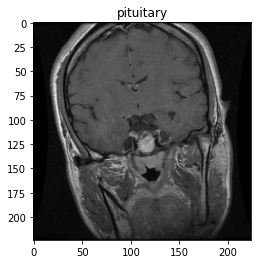

In [ ]:
print_image(x_train[15],y_train[15])

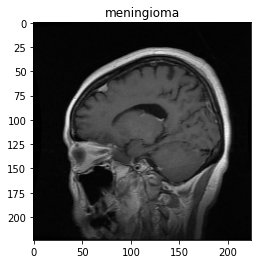

In [ ]:
print_image(x_test[6],y_test[6])

In [ ]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [ ]:
x_train_scaled.shape

(2152, 224, 224, 3)

In [ ]:
y_train=np.array(y_train)
y_train.shape

(2152,)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

## **model - 3:  cnn model with only dropout layers**



# 3.1 adam optimizer

In [ ]:
model3_1=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
])
model3_1.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model3_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 4s 14ms/step - loss: 2.2848 - accuracy: 0.3755
Epoch 2/100
68/68 [==============================] - 1s 13ms/step - loss: 1.2026 - accuracy: 0.4294
Epoch 3/100
68/68 [==============================] - 1s 14ms/step - loss: 1.1279 - accuracy: 0.4568
Epoch 4/100
68/68 [==============================] - 1s 14ms/step - loss: 1.0899 - accuracy: 0.4391
Epoch 5/100
68/68 [==============================] - 1s 13ms/step - loss: 1.0590 - accuracy: 0.4442
Epoch 6/100
68/68 [==============================] - 1s 14ms/step - loss: 1.0400 - accuracy: 0.4661
Epoch 7/100
68/68 [==============================] - 1s 13ms/step - loss: 0.9949 - accuracy: 0.4763
Epoch 8/100
68/68 [==============================] - 1s 13ms/step - loss: 1.0046 - accuracy: 0.4619
Epoch 9/100
68/68 [==============================] - 1s 14ms/step - loss: 0.9742 - accuracy: 0.4926
Epoch 10/100
68/68 [==============================] - 1s 16ms/step - loss: 0.9721 - accuracy: 0.4944

In [ ]:
model3_1.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 0s 13ms/step - loss: 0.9905 - accuracy: 0.6003


[0.9905068278312683, 0.6002785563468933]

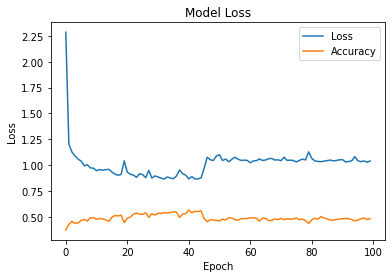

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

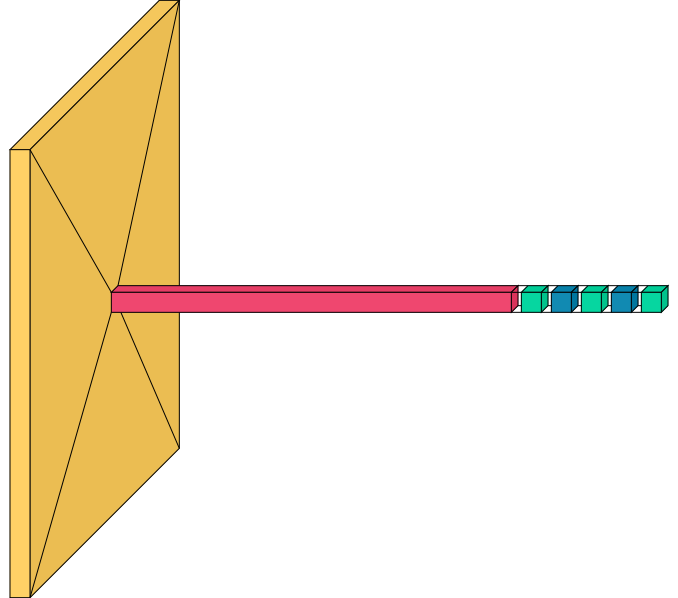

In [ ]:
visualkeras.layered_view(model3_1)

# 3.2 ada delta optimizer

In [ ]:
model3_2=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
])
model3_2.compile(
optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model3_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 3s 17ms/step - loss: 1.4212 - accuracy: 0.2742
Epoch 2/100
68/68 [==============================] - 1s 17ms/step - loss: 1.3555 - accuracy: 0.3425
Epoch 3/100
68/68 [==============================] - 1s 17ms/step - loss: 1.3260 - accuracy: 0.3750
Epoch 4/100
68/68 [==============================] - 1s 17ms/step - loss: 1.3121 - accuracy: 0.3927
Epoch 5/100
68/68 [==============================] - 1s 16ms/step - loss: 1.2793 - accuracy: 0.4275
Epoch 6/100
68/68 [==============================] - 1s 17ms/step - loss: 1.2639 - accuracy: 0.4331
Epoch 7/100
68/68 [==============================] - 1s 17ms/step - loss: 1.2478 - accuracy: 0.4521
Epoch 8/100
68/68 [==============================] - 1s 14ms/step - loss: 1.2399 - accuracy: 0.4493
Epoch 9/100
68/68 [==============================] - 1s 13ms/step - loss: 1.2152 - accuracy: 0.4624
Epoch 10/100
68/68 [==============================] - 1s 13ms/step - loss: 1.2036 - accuracy: 0.4735

In [ ]:
model3_2.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 15ms/step - loss: 0.8104 - accuracy: 0.6852


[0.8104342222213745, 0.6852367520332336]

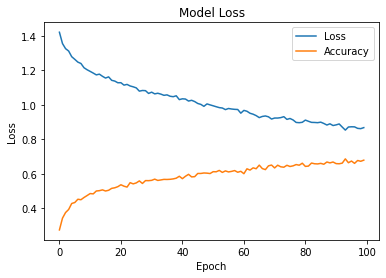

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

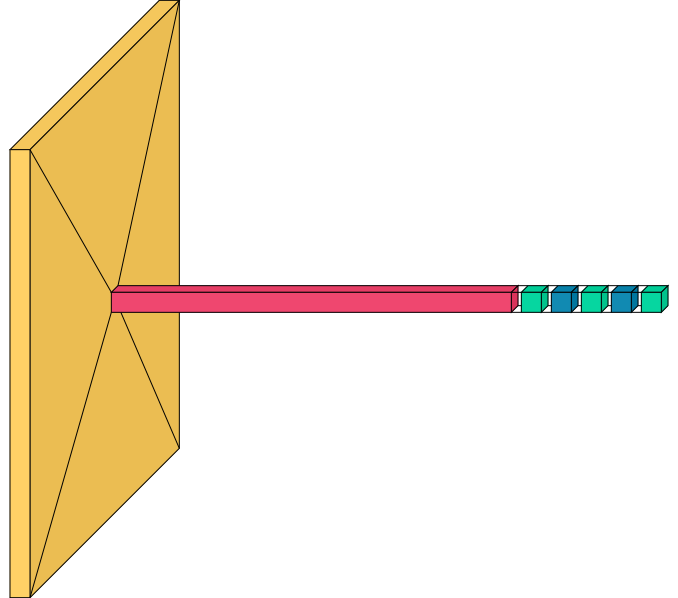

In [ ]:
visualkeras.layered_view(model3_2)

# 3.3 adagrad optimizer

In [ ]:
model3_3=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
])
model3_3.compile(
optimizer="adagrad",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model3_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 3s 14ms/step - loss: 1.2826 - accuracy: 0.4108
Epoch 2/100
68/68 [==============================] - 1s 13ms/step - loss: 1.1471 - accuracy: 0.4991
Epoch 3/100
68/68 [==============================] - 1s 14ms/step - loss: 1.0935 - accuracy: 0.5362
Epoch 4/100
68/68 [==============================] - 1s 13ms/step - loss: 1.0455 - accuracy: 0.5599
Epoch 5/100
68/68 [==============================] - 1s 13ms/step - loss: 0.9928 - accuracy: 0.5864
Epoch 6/100
68/68 [==============================] - 1s 14ms/step - loss: 0.9529 - accuracy: 0.5971
Epoch 7/100
68/68 [==============================] - 1s 13ms/step - loss: 0.9170 - accuracy: 0.6138
Epoch 8/100
68/68 [==============================] - 1s 13ms/step - loss: 0.8791 - accuracy: 0.6468
Epoch 9/100
68/68 [==============================] - 1s 13ms/step - loss: 0.8593 - accuracy: 0.6585
Epoch 10/100
68/68 [==============================] - 1s 13ms/step - loss: 0.8234 - accuracy: 0.6594

In [ ]:
model3_3.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 0s 12ms/step - loss: 0.4590 - accuracy: 0.8315


[0.4590103328227997, 0.8314763307571411]

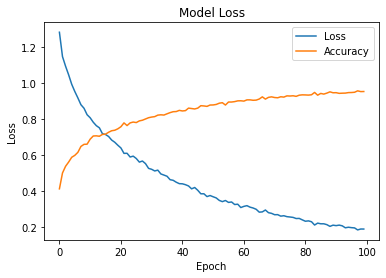

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

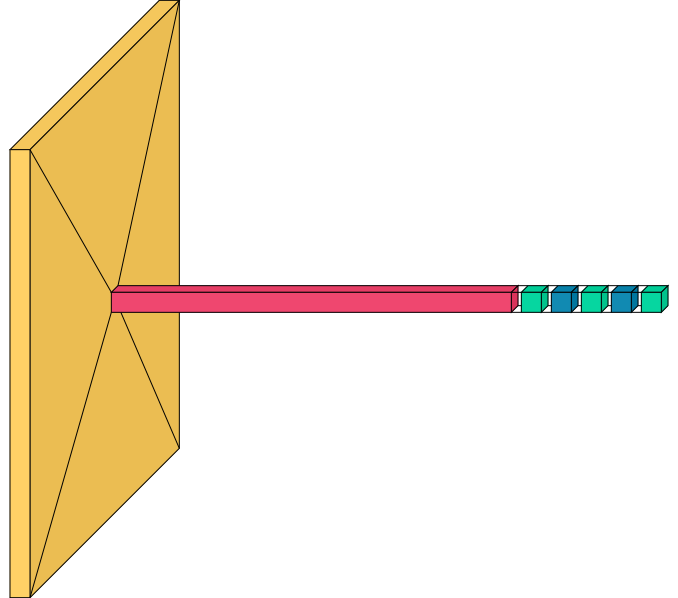

In [ ]:
visualkeras.layered_view(model3_3)

# 3.4 RMSprop optimizer

In [ ]:
model3_4=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(4,activation="softmax")
])
model3_4.compile(
optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model3_4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
68/68 [==============================] - 2s 15ms/step - loss: 2.6974 - accuracy: 0.3773
Epoch 2/100
68/68 [==============================] - 1s 16ms/step - loss: 1.2894 - accuracy: 0.4089
Epoch 3/100
68/68 [==============================] - 1s 14ms/step - loss: 1.1889 - accuracy: 0.4563
Epoch 4/100
68/68 [==============================] - 1s 16ms/step - loss: 1.1508 - accuracy: 0.4800
Epoch 5/100
68/68 [==============================] - 1s 16ms/step - loss: 1.1125 - accuracy: 0.4707
Epoch 6/100
68/68 [==============================] - 1s 15ms/step - loss: 1.0941 - accuracy: 0.4967
Epoch 7/100
68/68 [==============================] - 1s 16ms/step - loss: 1.0582 - accuracy: 0.4935
Epoch 8/100
68/68 [==============================] - 1s 15ms/step - loss: 1.0113 - accuracy: 0.5028
Epoch 9/100
68/68 [==============================] - 1s 16ms/step - loss: 0.9974 - accuracy: 0.5297
Epoch 10/100
68/68 [==============================] - 1s 13ms/step - loss: 0.9760 - accuracy: 0.5339

In [ ]:
model3_4.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 0s 12ms/step - loss: 0.9590 - accuracy: 0.7925


[0.9590195417404175, 0.7924790978431702]

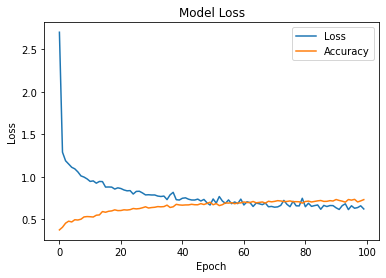

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

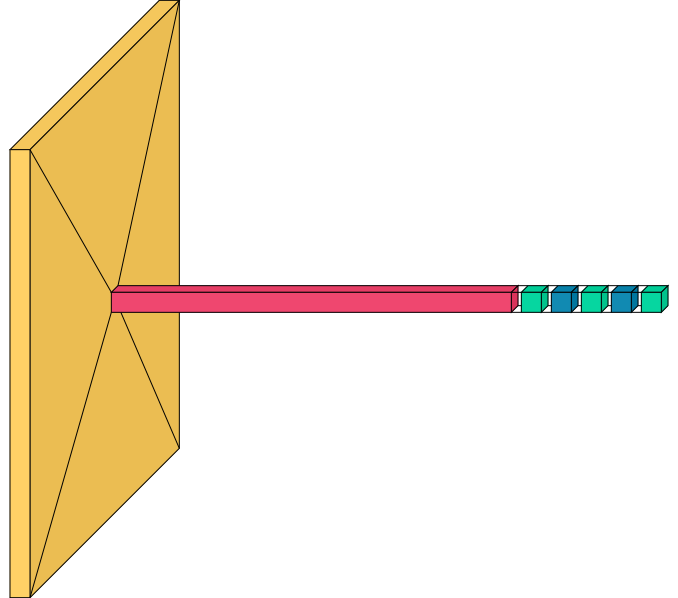

In [ ]:
visualkeras.layered_view(model3_4)

# **model - 4:  cnn model only with argumentation layers**

# 4.1 adam optimizer

In [ ]:
model4_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model4_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 15s 79ms/step - loss: 1.8831 - accuracy: 0.3206
Epoch 2/100
68/68 [==============================] - 8s 122ms/step - loss: 1.2883 - accuracy: 0.3964
Epoch 3/100
68/68 [==============================] - 5s 79ms/step - loss: 1.1491 - accuracy: 0.4930
Epoch 4/100
68/68 [==============================] - 6s 89ms/step - loss: 1.0698 - accuracy: 0.5265
Epoch 5/100
68/68 [==============================] - 8s 112ms/step - loss: 1.0016 - accuracy: 0.5562
Epoch 6/100
68/68 [==============================] - 5s 78ms/step - loss: 0.9355 - accuracy: 0.6055
Epoch 7/100
68/68 [==============================] - 7s 101ms/step - loss: 0.8777 - accuracy: 0.6310
Epoch 8/100
68/68 [==============================] - 7s 99ms/step - loss: 0.8491 - accuracy: 0.6283
Epoch 9/100
68/68 [==============================] - 5s 78ms/step - loss: 0.8005 - accuracy: 0.6552
Epoch 10/100
68/68 [==============================] - 8s 113ms/step - loss: 0.7592 - accuracy: 0.6849
Epoch 

In [ ]:
model4_1.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 20ms/step - loss: 0.5162 - accuracy: 0.8482


[0.5162426233291626, 0.8481894135475159]

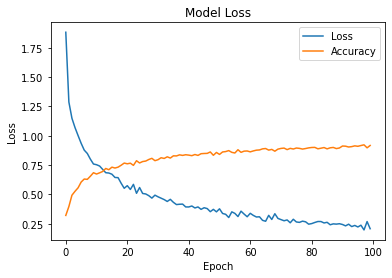

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

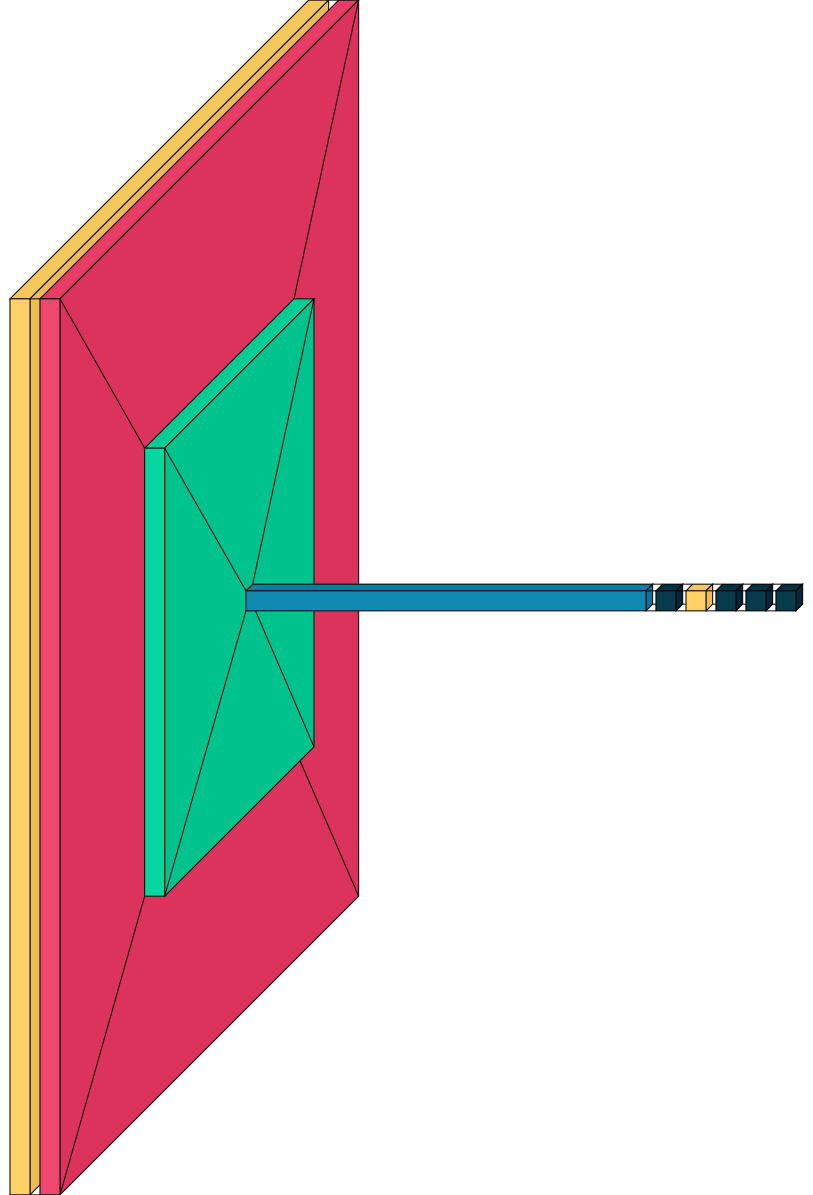

In [ ]:
visualkeras.layered_view(model4_1)

# 4.2 ada delta optimizer

In [ ]:
model4_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_2.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model4_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 20s 94ms/step - loss: 1.3798 - accuracy: 0.2965
Epoch 2/100
68/68 [==============================] - 5s 75ms/step - loss: 1.3655 - accuracy: 0.3662
Epoch 3/100
68/68 [==============================] - 8s 114ms/step - loss: 1.3581 - accuracy: 0.3559
Epoch 4/100
68/68 [==============================] - 6s 87ms/step - loss: 1.3481 - accuracy: 0.3787
Epoch 5/100
68/68 [==============================] - 5s 78ms/step - loss: 1.3425 - accuracy: 0.3764
Epoch 6/100
68/68 [==============================] - 8s 120ms/step - loss: 1.3351 - accuracy: 0.3815
Epoch 7/100
68/68 [==============================] - 6s 82ms/step - loss: 1.3361 - accuracy: 0.3778
Epoch 8/100
68/68 [==============================] - 5s 77ms/step - loss: 1.3303 - accuracy: 0.3834
Epoch 9/100
68/68 [==============================] - 8s 124ms/step - loss: 1.3184 - accuracy: 0.3987
Epoch 10/100
68/68 [==============================] - 5s 76ms/step - loss: 1.3243 - accuracy: 0.3778
Epoch 1

In [ ]:
model4_2.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 21ms/step - loss: 1.0824 - accuracy: 0.5891


[1.082444429397583, 0.5891364812850952]

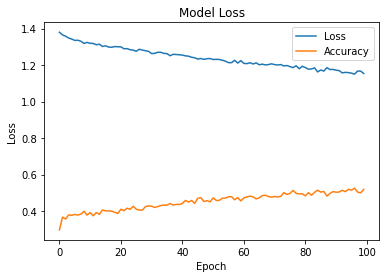

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

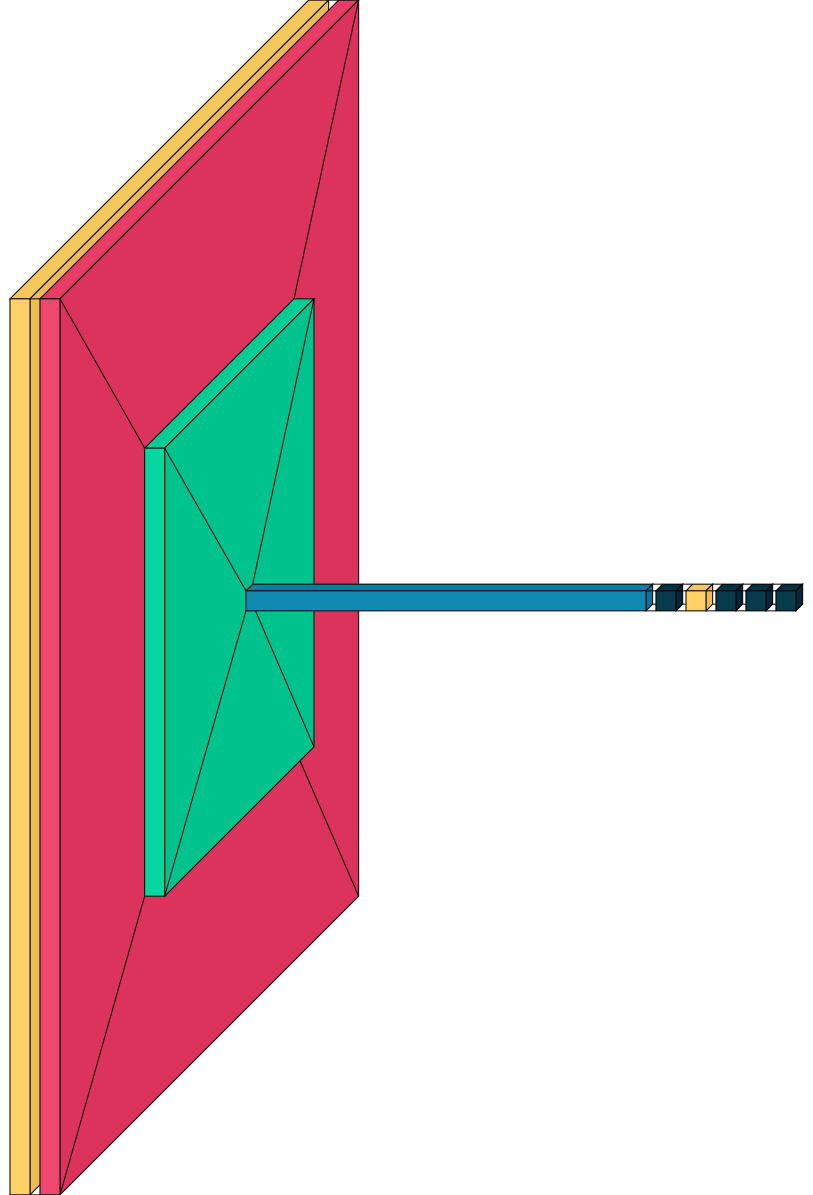

In [ ]:
visualkeras.layered_view(model4_2)

# 4.3 adagrad optimizer

In [ ]:
model4_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_3.compile(optimizer="adagrad",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model4_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 10s 78ms/step - loss: 1.3386 - accuracy: 0.3569
Epoch 2/100
68/68 [==============================] - 6s 86ms/step - loss: 1.3042 - accuracy: 0.4117
Epoch 3/100
68/68 [==============================] - 8s 115ms/step - loss: 1.2758 - accuracy: 0.4029
Epoch 4/100
68/68 [==============================] - 5s 77ms/step - loss: 1.2600 - accuracy: 0.4284
Epoch 5/100
68/68 [==============================] - 6s 89ms/step - loss: 1.2374 - accuracy: 0.4303
Epoch 6/100
68/68 [==============================] - 8s 112ms/step - loss: 1.2275 - accuracy: 0.4517
Epoch 7/100
68/68 [==============================] - 5s 77ms/step - loss: 1.2105 - accuracy: 0.4540
Epoch 8/100
68/68 [==============================] - 6s 92ms/step - loss: 1.1789 - accuracy: 0.4777
Epoch 9/100
68/68 [==============================] - 7s 108ms/step - loss: 1.1768 - accuracy: 0.4851
Epoch 10/100
68/68 [==============================] - 5s 77ms/step - loss: 1.1601 - accuracy: 0.4837
Epoch 1

In [ ]:
model4_3.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 16ms/step - loss: 0.6659 - accuracy: 0.7409


[0.6658886075019836, 0.7409470677375793]

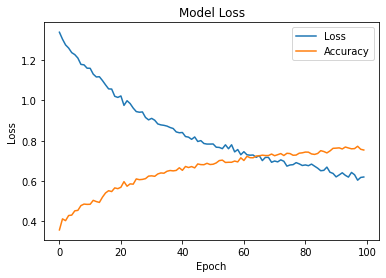

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

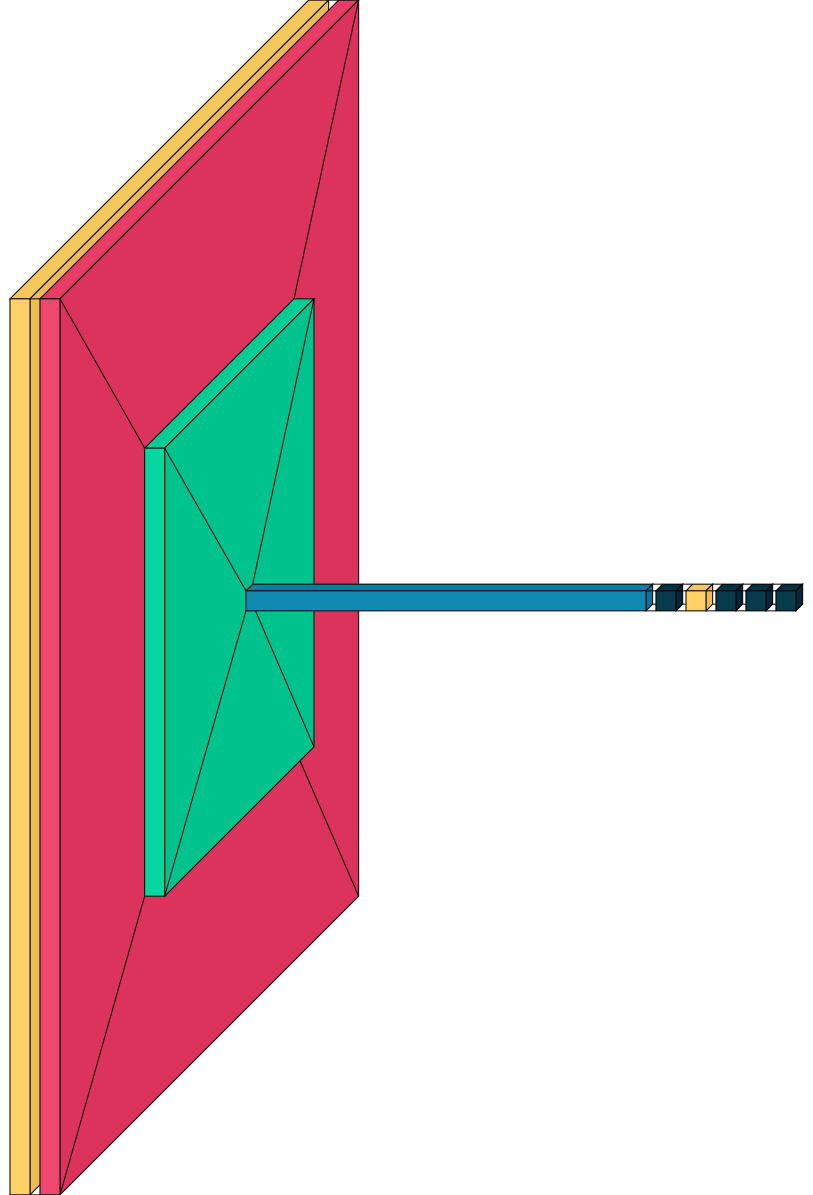

In [ ]:
visualkeras.layered_view(model4_3)

# 4.4 RMSprop optimizer

In [ ]:
model4_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(4,activation="softmax")
])
model4_4.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model4_4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100


68/68 [==============================] - 12s 113ms/step - loss: 1.9942 - accuracy: 0.3164
Epoch 2/100
68/68 [==============================] - 6s 92ms/step - loss: 1.2506 - accuracy: 0.4247
Epoch 3/100
68/68 [==============================] - 5s 77ms/step - loss: 1.0910 - accuracy: 0.5376
Epoch 4/100
68/68 [==============================] - 7s 104ms/step - loss: 1.0003 - accuracy: 0.5753
Epoch 5/100
68/68 [==============================] - 7s 96ms/step - loss: 0.8972 - accuracy: 0.6148
Epoch 6/100
68/68 [==============================] - 6s 92ms/step - loss: 0.8275 - accuracy: 0.6520
Epoch 7/100
68/68 [==============================] - 9s 136ms/step - loss: 0.7810 - accuracy: 0.6696
Epoch 8/100
68/68 [==============================] - 8s 113ms/step - loss: 0.7515 - accuracy: 0.6808
Epoch 9/100
68/68 [==============================] - 5s 76ms/step - loss: 0.7377 - accuracy: 0.6840
Epoch 10/100
68/68 [==============================] - 8s 115ms/step - loss: 0.6780 - accuracy: 0.7258
Epoch

In [ ]:
model4_4.evaluate(x_test_scaled,np.array(y_test))

23/23 [==============================] - 1s 15ms/step - loss: 0.5947 - accuracy: 0.8510


[0.5946546196937561, 0.8509749174118042]

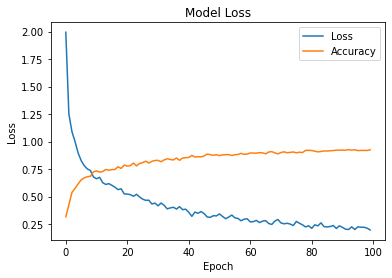

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

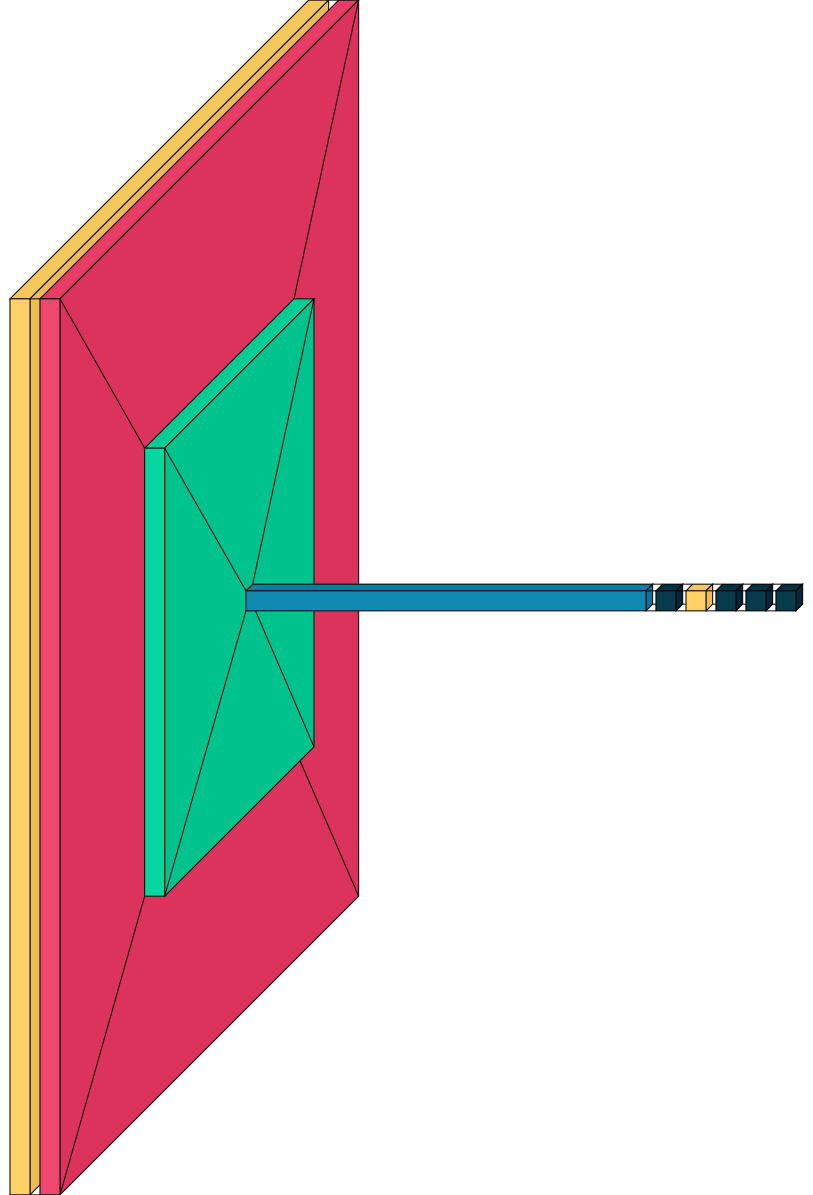

In [ ]:
visualkeras.layered_view(model4_4)